In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas_datareader.data as web
from datetime import datetime
from __future__ import division
import yfinance as yf
from scipy.stats import pearsonr

In [3]:
# Answering the following questions along the way
# 1.) What was the change in price of the stock over time?
# 2.) What was the daily return of the stock on average?
# 3.) What was the moving average of the various stocks?
# 4.) What was the correlation between different stocks' closing prices?
# 5.) What was the correlation between different stocks' daily returns?
# 6.) How much value do we put at risk by investing in a particular stock?
# 7.) How can we attempt to predict future stock behavior?

In [2]:
tech_list = ['AAPL','GOOG', 'MSFT', 'AMZN']

In [3]:
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)
stock_data = {}

In [4]:
for stock in tech_list:
    stock_data[stock] = yf.download(stock, start=start, end=end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
print(stock_data['AAPL'].head())

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-05-30  190.399567  191.285423  189.742650  189.872035  49947900
2024-05-31  191.355103  191.673620  189.025999  190.548875  75158300
2024-06-03  193.126801  194.082338  191.623835  192.002056  50080500
2024-06-04  193.445328  194.410814  192.131465  193.733971  47471400
2024-06-05  194.958237  195.983441  193.962892  194.490423  54156800


In [6]:
print(stock_data['GOOG'].head())

Price            Close        High         Low        Open    Volume
Ticker            GOOG        GOOG        GOOG        GOOG      GOOG
Date                                                                
2024-05-30  172.741821  175.857071  172.413375  175.857071  18844000
2024-05-31  173.139938  173.597761  170.164028  172.582566  28085200
2024-06-03  173.597778  175.030993  171.637064  173.060331  20742800
2024-06-04  174.304413  174.364128  172.403413  173.627611  14066600
2024-06-05  176.235275  177.131026  174.463652  175.702794  15233900


In [7]:
stock_data['AAPL'].describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,222.928664,225.202881,220.213412,222.547972,5.622309e+07
std,15.460596,14.977227,15.899013,15.656449,3.241853e+07
min,172.194199,190.090729,168.988411,171.724805,2.323470e+07
25%,213.130150,215.233423,210.588758,212.874446,3.973505e+07
50%,224.210571,226.070020,222.231372,224.170641,4.796850e+07
75%,232.515671,234.263584,229.182156,232.447929,6.036088e+07
max,258.396667,259.474086,257.010028,257.568678,3.186799e+08


In [8]:
stock_data['AAPL'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-05-30 to 2025-05-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   250 non-null    float64
 1   (High, AAPL)    250 non-null    float64
 2   (Low, AAPL)     250 non-null    float64
 3   (Open, AAPL)    250 non-null    float64
 4   (Volume, AAPL)  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


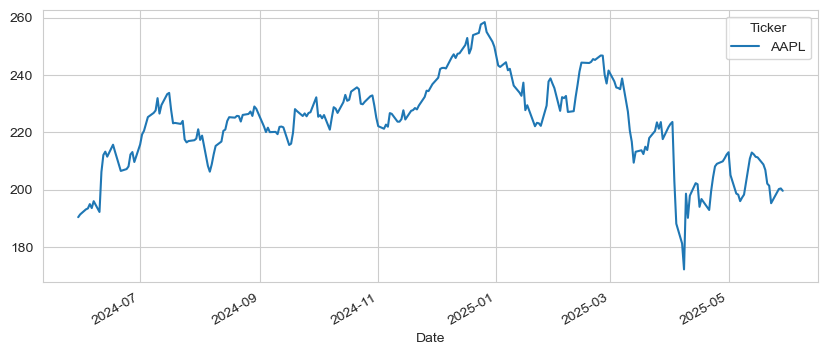

In [9]:
stock_data['AAPL']['Close'].plot(legend=True,figsize=(10,4));
plt.show()

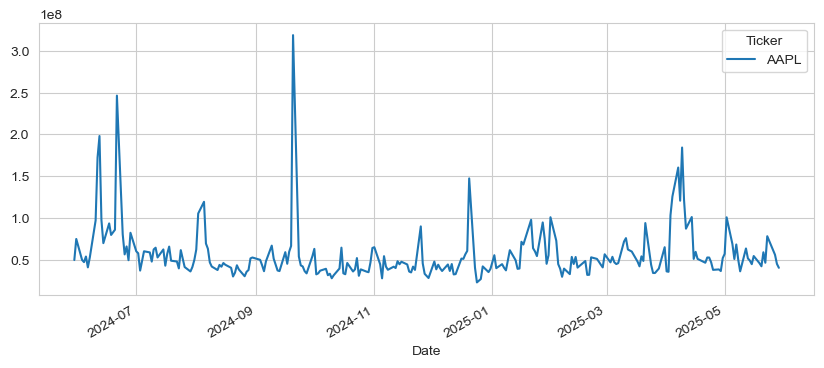

In [10]:
stock_data['AAPL']['Volume'].plot(legend=True,figsize=(10,4));
plt.show()

In [11]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    stock_data['AAPL'][column_name] = stock_data['AAPL']['Close'].rolling(window=ma).mean()

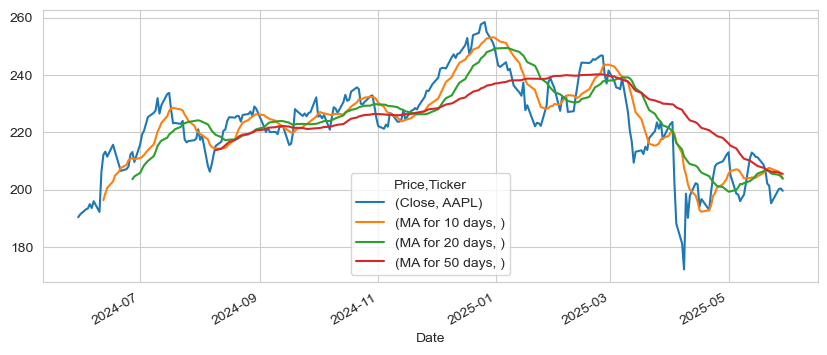

In [12]:
stock_data['AAPL'][['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4));
plt.show()

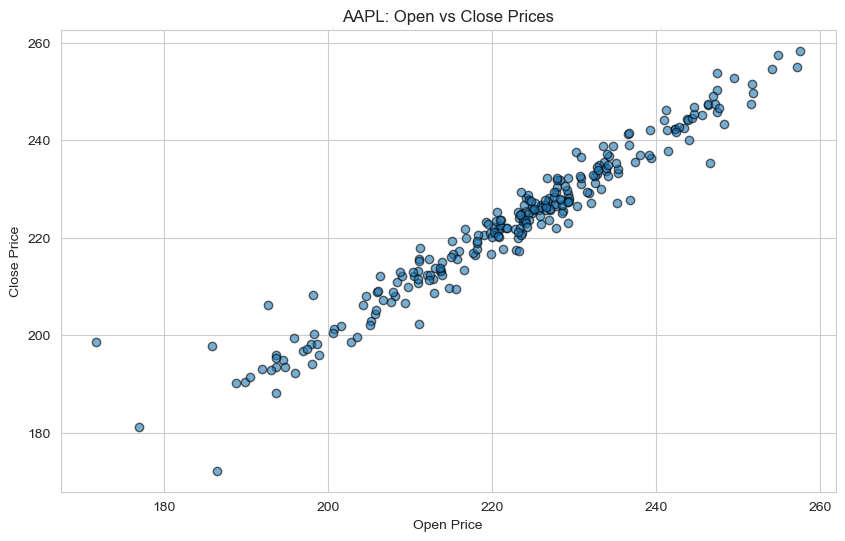

In [13]:
aapl = stock_data['AAPL']

plt.figure(figsize=(10, 6))
plt.scatter(aapl['Open'], aapl['Close'], alpha=0.6, edgecolor='k')

plt.title('AAPL: Open vs Close Prices')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

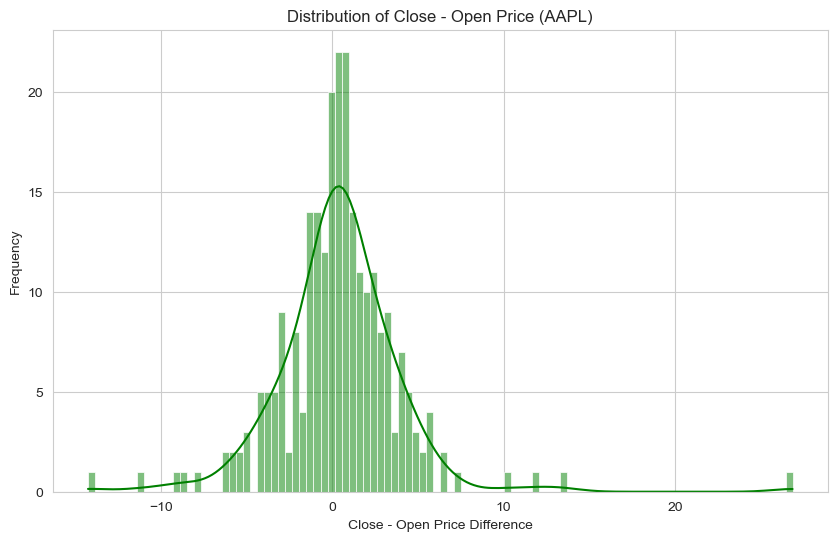

In [14]:
open_col = ('Open', 'AAPL')
close_col = ('Close', 'AAPL')
aapl = aapl.dropna(subset=[open_col, close_col])
aapl['Open-Close Diff'] = aapl[close_col] - aapl[open_col]
plt.figure(figsize=(10, 6))
sns.histplot(aapl['Open-Close Diff'], bins=100, kde=True, color='green')
plt.title('Distribution of Close - Open Price (AAPL)')
plt.xlabel('Close - Open Price Difference')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [15]:
tickers = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()

start = datetime(end.year-1,end.month,end.day)

closing_df = yf.download(tickers, start=start, end=end)['Close']
print(closing_df.head())

[*********************100%***********************]  4 of 4 completed

Ticker            AAPL        AMZN        GOOG        MSFT
Date                                                      
2024-05-30  190.399567  179.320007  172.741821  411.514954
2024-05-31  191.355087  176.440002  173.139923  411.971466
2024-06-03  193.126801  178.339996  173.597763  410.373688
2024-06-04  193.445312  179.339996  174.304413  412.904297
2024-06-05  194.958237  181.279999  176.235275  420.783844


In [16]:
tech_rets = closing_df.pct_change()

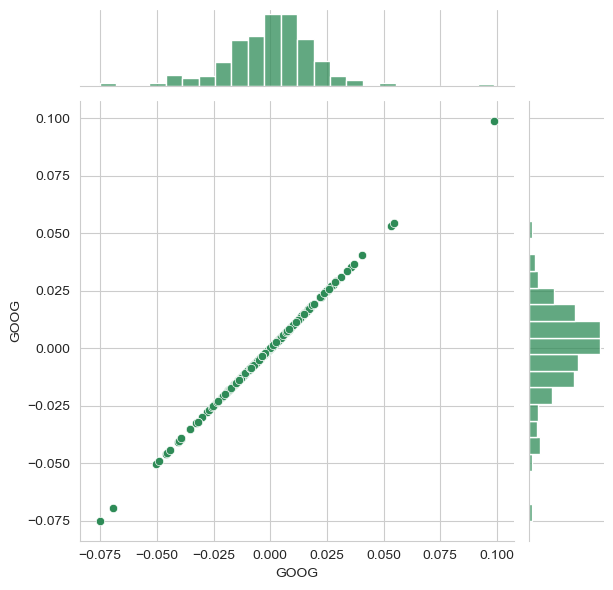

In [17]:
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen');
plt.show()

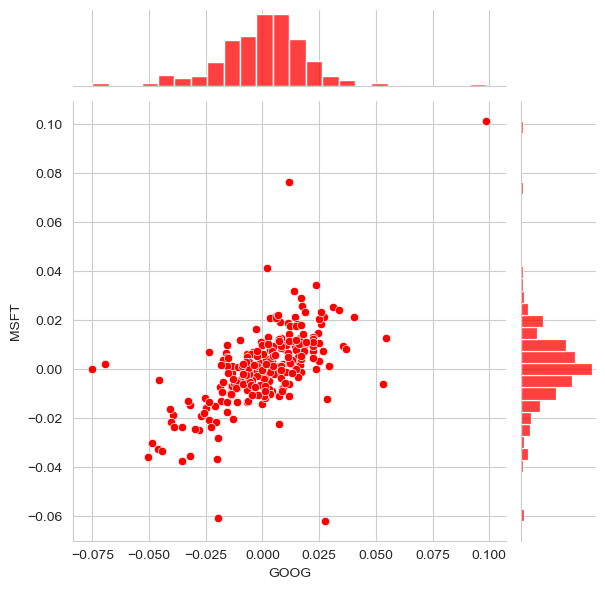

In [18]:
sns.jointplot(x='GOOG',y='MSFT', data=tech_rets,kind='scatter', color='red')
plt.show()

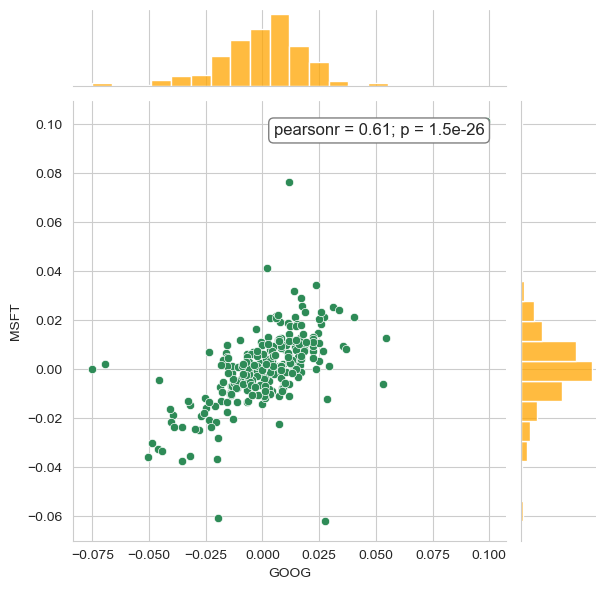

In [19]:
x = 'GOOG'
y = 'MSFT'

valid_data = tech_rets[[x, y]].dropna()
r, p = pearsonr(valid_data[x], valid_data[y])

corr_text = f'pearsonr = {r:.2f}; p = {p:.1e}'

g = sns.JointGrid(data=tech_rets, x=x, y=y)
g.plot_joint(sns.scatterplot, color="seagreen")
g.plot_marginals(sns.histplot, kde=False, color="orange", bins=20)

g.ax_joint.text(
    0.95, 0.95, corr_text,
    transform=g.ax_joint.transAxes,
    ha='right', va='top',
    fontsize=12,
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="gray")
)

plt.show()

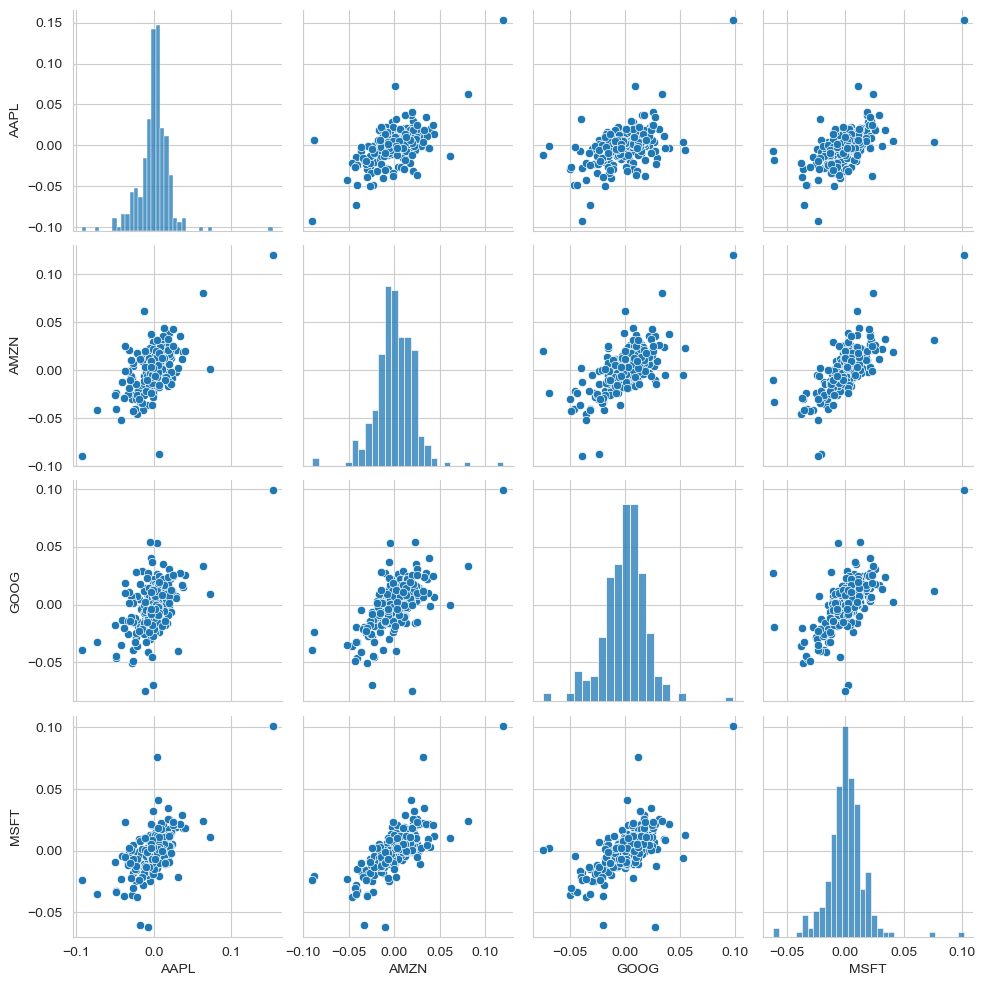

In [20]:
sns.pairplot(tech_rets.dropna());
plt.show()

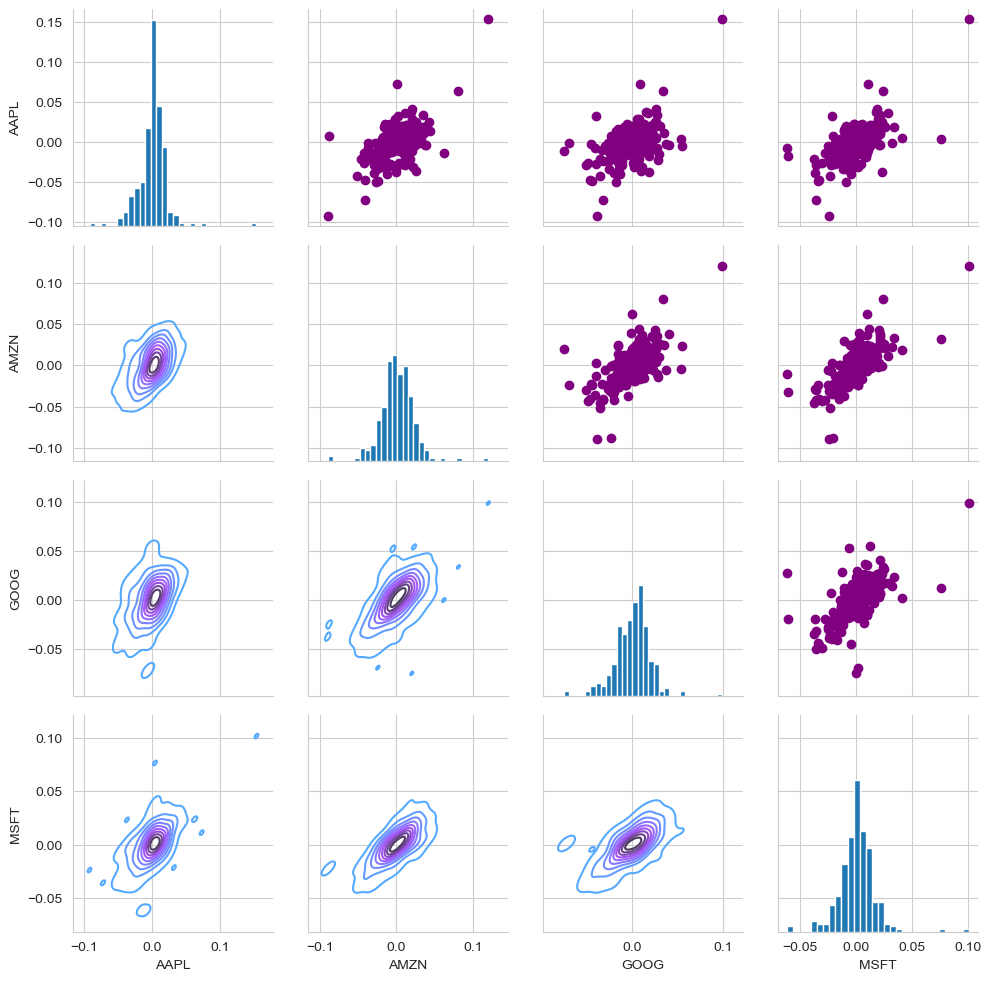

In [21]:
returns_fig = sns.PairGrid(tech_rets.dropna());

returns_fig.map_upper(plt.scatter,color='purple');

returns_fig.map_lower(sns.kdeplot,cmap='cool_d');

returns_fig.map_diag(plt.hist,bins=30);

plt.show()

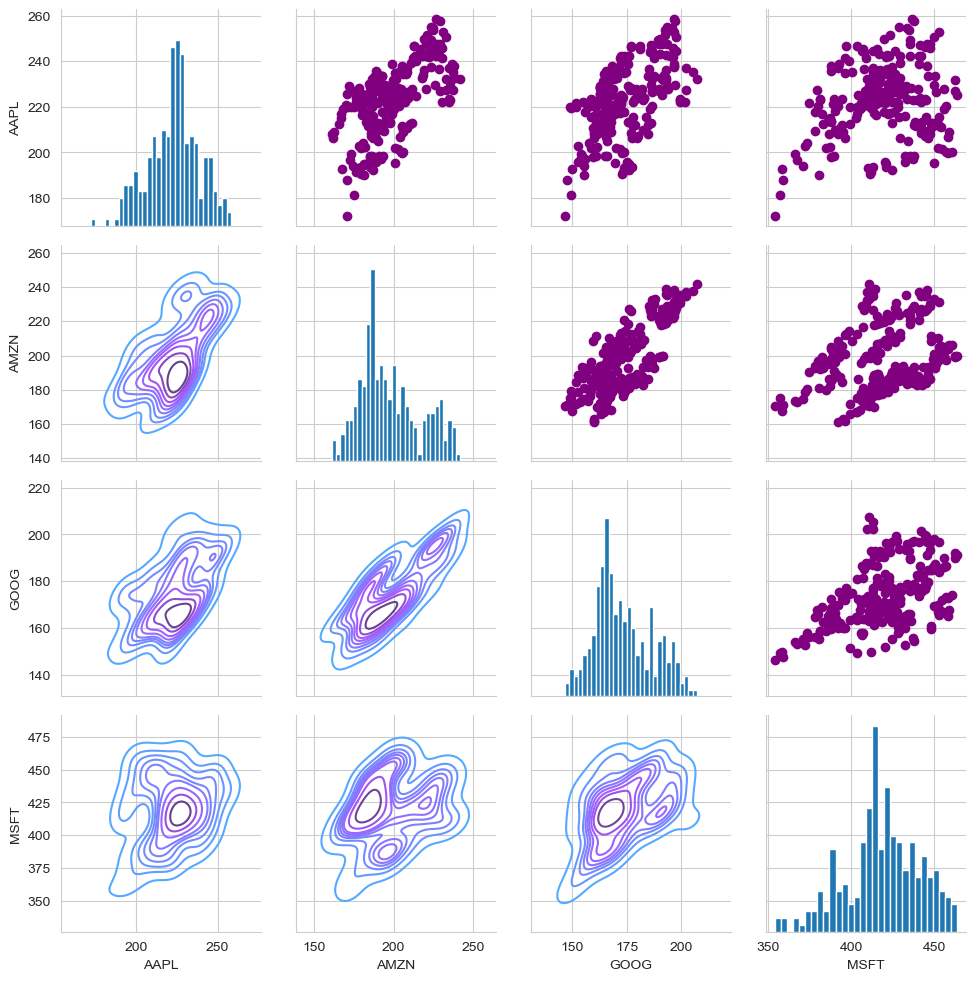

In [22]:
returns_fig = sns.PairGrid(closing_df);

returns_fig.map_upper(plt.scatter,color='purple');

returns_fig.map_lower(sns.kdeplot,cmap='cool_d');

returns_fig.map_diag(plt.hist,bins=30);

plt.show()

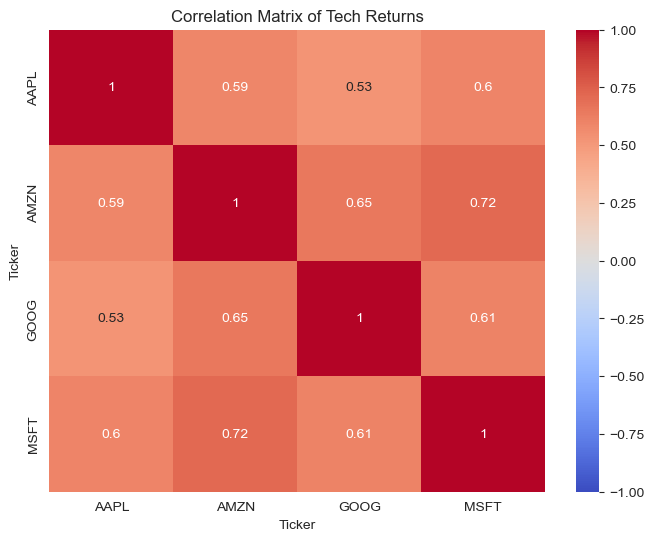

In [23]:
corr = tech_rets.dropna().corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Tech Returns")
plt.show()

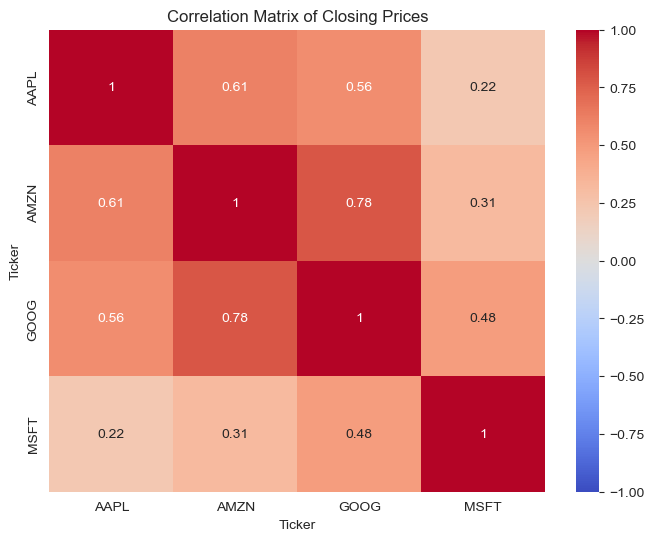

In [24]:
closing_corr = closing_df.dropna().corr()

plt.figure(figsize=(8, 6))
sns.heatmap(closing_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Closing Prices")
plt.show()

In [119]:
#Risk Analysis

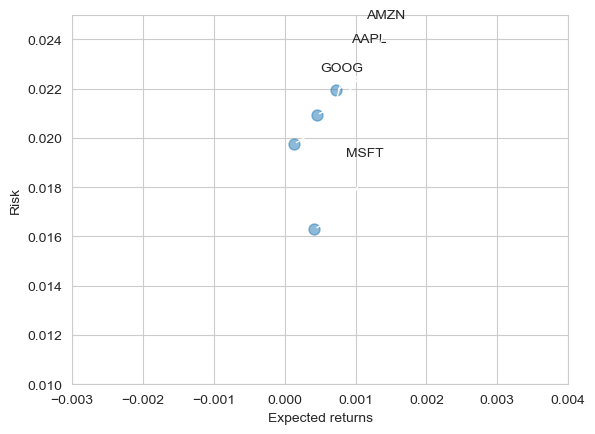

In [28]:
rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

plt.show()

In [29]:
rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2024-05-30,0.005255,-0.014834,-0.021646,-0.033786
2024-05-31,0.005019,-0.016061,0.002305,0.001109
2024-06-03,0.009259,0.010768,0.002644,-0.003878
2024-06-04,0.001649,0.005607,0.004071,0.006167
2024-06-05,0.007821,0.010817,0.011078,0.019083


In [30]:
rets['AAPL'].quantile(0.05)   #bootstrap method

-0.031732896183236534

In [31]:
days = 365

dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [32]:
def stock_monte_carlo(start_price, days, mu, sigma):
    "Simulates stock prices using a basic Monte Carlo model."
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days): 
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x - 1] + (price[x - 1] * (drift[x] + shock[x]))
        
    return price

In [33]:
print(stock_data['GOOG'].head())

Price            Close        High         Low        Open    Volume
Ticker            GOOG        GOOG        GOOG        GOOG      GOOG
Date                                                                
2024-05-29  176.563705  177.389795  175.429080  175.976490  15023800
2024-05-30  172.741821  175.857071  172.413375  175.857071  18844000
2024-05-31  173.139923  173.597746  170.164013  172.582550  28085200
2024-06-03  173.597763  175.030977  171.637049  173.060315  20742800
2024-06-04  174.304413  174.364128  172.403413  173.627611  14066600


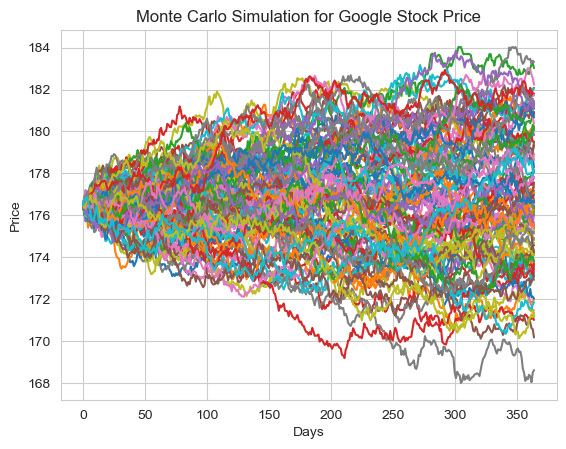

In [34]:
start_price = 176.474126

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma), alpha=1)

plt.xlabel("Days")
plt.ylabel("Price")  
plt.title("Monte Carlo Simulation for Google Stock Price")
plt.show()

In [35]:
runs = 10000

simulations = np.zeros(runs)

np.set_printoptions(threshold=5)

for run in range(runs):    
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

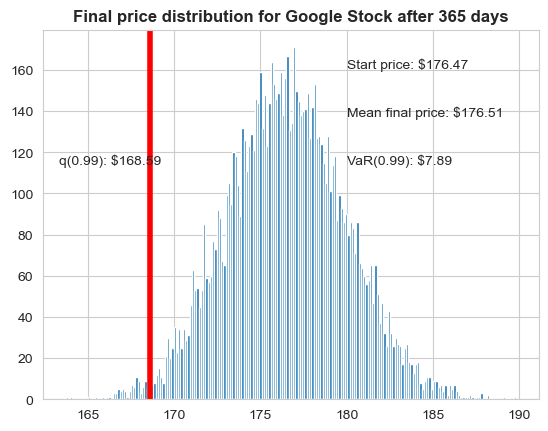

In [36]:
q = np.percentile(simulations, 1)
    
plt.hist(simulations,bins=200)

plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

plt.show()

In [ ]:
#This basically means for every initial stock you purchase your putting about $7.91 at risk 99% of the time from our Monte Carlo Simulation.